<a href="https://colab.research.google.com/github/Soumyajyotidutta/MLProjects/blob/main/MLCyber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler # library for undersampling
from sklearn.model_selection import train_test_split # split training and testing data

In [86]:
# read the files
df1 = pd.read_csv('/content/brazilian-malware.zip')
df2 = pd.read_csv('/content/goodware.csv')

In [87]:
print(df1.shape, df2.shape)

(50181, 28) (21116, 29)


In [88]:
# reduce dataframe to desired info
df_mal = df1[['ImportedDlls', 'Identify', 'ImportedSymbols', 'SHA1']]
df_good = df2[['ImportedDlls', 'Identify', 'ImportedSymbols', 'SHA1']]

In [89]:
print(df_mal.shape, df_good.shape)

(50181, 4) (21116, 4)


In [90]:
# add label to the goodware dataframe
df_good.loc[:, 'MyLabel'] = 0
df_good.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(21116, 5)

In [91]:
# add label to the malware dataframe
df_mal.loc[:, 'MyLabel'] = 1
df_mal.shape

(50181, 5)

In [92]:
# create master dataframe by concatenating goodware and malware dataframes
frames = [df_mal, df_good]
dfMaster = pd.concat(frames)
dfMaster.shape

(71297, 5)

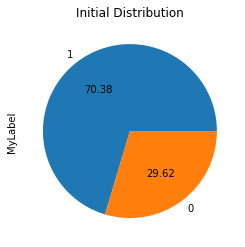

In [93]:
# distribution of labels
fig1 = dfMaster['MyLabel'].value_counts().plot.pie(autopct='%0.2f')
_ = fig1.set_title('Initial Distribution')

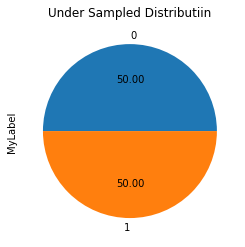

In [94]:
# undersampling of class 1 (malware)
x = dfMaster.drop(['MyLabel'], axis=1)
y = dfMaster['MyLabel']

rUs = RandomUnderSampler(sampling_strategy = 1)
xres, yres = rUs.fit_resample(x, y)

fig2 = yres.value_counts().plot.pie(autopct='%0.2f')
_ = fig2.set_title('Under Sampled Distributiin')

In [95]:
# balanced dataset
dfBalanced = pd.concat([xres, yres], axis = 1)
dfBalanced.shape

(42232, 5)

In [96]:
# creating utilizable goodware datasets by sampling from the total balanced dataset
df_goodware = dfBalanced.loc[dfBalanced['MyLabel'] == 0]
df_goodware = df_goodware.sample(frac = 0.4)
df_goodware.shape

(8446, 5)

In [97]:
# creating utilizable malware datasets by sampling from the total balanced dataset
df_malware = dfBalanced.loc[dfBalanced['MyLabel'] == 1]
df_malware = df_malware.sample(frac = 0.4)
df_malware.shape

(8446, 5)

In [98]:
# creating the final dataset
frames = [df_malware, df_goodware]
myDataset = pd.concat(frames)
myDataset = myDataset.drop(columns = ['ImportedDlls', 'ImportedSymbols', 'Identify'], axis = 1)

In [40]:
# for i in range(len(myDataset.columns[: -1])):
#   label = myDataset.columns[i]
#   plt.hist(myDataset[myDataset['MyLabel'] == 1][label], color = 'blue', label = 'Malware')
#   plt.hist(myDataset[myDataset['MyLabel'] == 0][label], color = 'red', label = 'Goodware')
#   plt.title(label)
#   plt.ylabel('Number')
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

In [99]:
x_train = myDataset[myDataset.columns[:-1]].values
y_train = myDataset[myDataset.columns[-1]].values

In [100]:
# create dataset for testing
df_good = df_good.drop(columns = ['ImportedDlls','ImportedSymbols', 'Identify'], axis = 1)
df_mal = df_mal.drop(columns = ['ImportedDlls','ImportedSymbols', 'Identify'], axis = 1)
df_goodware_test = df_good.sample(frac = 0.4)
df_malware_test = df_mal.sample(frac = 0.4)

frames_test = [df_goodware_test, df_malware_test]

testData = pd.concat(frames_test)

testData

,SHA1,MyLabel
3867,f954b06376208c3b21d17042b937e73cca8dca95,0
14941,00570d8724a06cb5b2fc22617f511b26dda23c97,0
2163,c049ef84be8e46f3d589ceb63729d0b9fda89afd,0
2194,19c1a11dc90928e06dbe72ed2eaa345d29cd999f,0
10611,da57a3dc696158ecd60607ce843ba9174577c631,0
...,...,...
38211,9b4c247a0cd6a95698bcf1063594e37215ddc721,1
10122,c8d40af0e798716db30874f2f2edecaa2e1a2fee,1
4366,1ac2fc99475390bdeae0186b5cb91cf4f6151f33,1
45721,b3a73a2e567de9fab2e26516cf2147413b0ece7d,1


In [101]:
x_placeholder = testData[testData.columns[:-1]].values
y_placeholder = testData[testData.columns[-1]].values

In [102]:
x_valid, x_test, y_valid, y_test = train_test_split(x_placeholder, y_placeholder, test_size=0.5, random_state=0)

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [113]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20


UnimplementedError: ignored